In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [2]:
df = pd.read_csv("data/belgian_property_prices.csv")

In [3]:
numerical_features = [
    "price",
    "bathrooms",
    "bedroom_1_surface",
    "bedroom_2_surface",
    "bedroom_3_surface",
    "bedrooms",
    "co2_emission",
    "cadastral_income",
    "construction_year",
    "covered_parking_spaces",
    "garden_surface",
    "kitchen_surface",
    "living_area",
    "living_room_surface",
    "number_of_frontages",
    "outdoor_parking_spaces",
    "primary_energy_consumption",
    "street_frontage_width",
    "surface_of_the_plot",
    "toilets",
    "width_of_the_lot_on_the_street",
    "yearly_theoretical_total_energy_consumption"
    ]

In [4]:
df["price_cat"] = pd.cut(df.price, bins=[0,250000,500000,750000,1000000,np.inf], labels=[0,1,2,3,4])

In [5]:
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df.price_cat, random_state=42)

In [6]:
test_feature = "price"

In [7]:
train_set["norm_test_feature"] =np.log(train_set[test_feature])

36 outliers removed. Previous min-max (10.275051108968611,15.937772096827038) current min-max (11.141861783579396,14.914122846632385)


<Axes: >

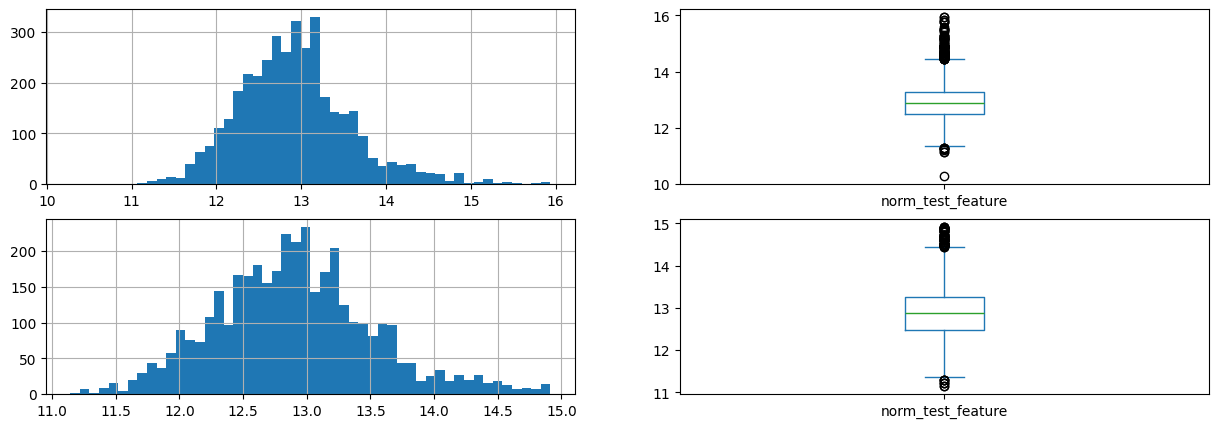

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15,5))
train_set["norm_test_feature"].hist(bins=50,ax=axs[0][0])
train_set["norm_test_feature"].plot.box(ax=axs[0][1])
z_scores = zscore(train_set["norm_test_feature"], nan_policy="omit")
outlier_indices = np.where(np.abs(z_scores) > 3)[0]

# STANDARD METHOD
filtered_train_set = train_set.drop(train_set.index[outlier_indices])
removed_outliers = len(outlier_indices)

#CUSTOM ALTERNATIVE METHOD IF THERE ARE TOO MANY OUTLIERS
# filtered_train_set = train_set.loc[(train_set['norm_test_feature'] <=6) | (pd.isna(train_set['norm_test_feature']))]
# removed_outliers = len(train_set) - len(filtered_train_set)

print(f"{removed_outliers} outliers removed. Previous min-max ({train_set['norm_test_feature'].min()},{train_set['norm_test_feature'].max()}) current min-max ({filtered_train_set['norm_test_feature'].min()},{filtered_train_set['norm_test_feature'].max()})")
filtered_train_set["norm_test_feature"].hist(bins=50,ax=axs[1][0])
filtered_train_set["norm_test_feature"].plot.box(ax=axs[1][1])

| Feature            | Transformation needed | Outliers removed | Previous limit | Reduced limit | Z-score-method |
|--------------------|-----------------------|------------------|----------------|---------------|----------------|
| bathrooms          | Square root           | 9                | 3.6            | 3             | No <= 3            |
| bedrooms_1_surface | /                     | 3                | 1492           | 66            | Yes             |
| bedrooms_2_surface | /                     | 2                | 1529           | 60            |Yes |
| bedrooms_3_surface | /                     | 6                | 2867           | 59            | No <=60            |
| bedrooms           | /                     | 11               | 25             | 10            | No <=10             |
| co2_emission       | Natural log          | 1                | 10.9           | 9.8           | No <=10 and > 0           |
| cadastral_income   | Natural log           | N/A                 | N/A                | N/A               | No > 0            |
| covered_parking_spaces | /                     | 10                  | 80               | 10              | No <=10            |
| garden_surface | Natural log| 1                  | 11.3                | 10.4               | No <=11 and > 0           |
| kitchen_surface    | Natural log | 4                  | 5.25  |3.91               | No <=4 and > 0            |
| living_area        | Natural log  | 1                | 0              | 3             | No > 0             |
| living_room_surface |Natural log | 10                 | 8.1               | 4.7             | Yes             |
| number_of_frontages | only consider values 2,3,4 and move to categorical features (gesloten, halfopen open bebouwing)     |
|outdoor_parking_spaces|/|3|100|20|No <=20|
|primary_energy_consumption|Square root|1|4497|40|Yes|
|street_frontage_width|Natural log |12|7.3|3.9|No <=4 and > 0|
|surface_of_the_plot|Natural log|2|0|1.8|No > 0|
|toilets|/|3|20|10|no <=10|
|width_of_the_lot_on_the_street|Natural log|5|7.5|5.8|No <=6 |
|yearly_theoretical_total_energy_consumption|Square root|8|782|475|Yes|